In [73]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

Time 范围 2022.10.01 - 2023.11.01

In [74]:
dataset = pd.read_csv("../2019-2023full_data/data_info_main_par.csv")
dataset["Time"] = pd.to_datetime(dataset["Time"])
# 根据日期（天）对数据进行分组，并计算每一天的平均气温
daily_average = dataset.groupby(dataset["Time"].dt.date).agg({"Temperature": "mean", "Relative Humidity": "mean"}).reset_index()

# 创建一个新的DataFrame，包含日期和对应的平均气温
new_data = pd.DataFrame({"Time": daily_average["Time"], "Temperature": daily_average["Temperature"],"Relative Humidity": daily_average["Relative Humidity"]})
new_data["THI"] = 0.81 * new_data["Temperature"] + 0.01 * 0.01 * new_data["Relative Humidity"] * (0.99 * new_data["Temperature"] - 14.3) + 46.3
# 将Time列转换为日期类型
new_data['Time'] = pd.to_datetime(new_data['Time']).dt.date
new_data

,Time,Temperature,Relative Humidity,THI
0,2019-07-31,26.095238,91.500000,67.542682
1,2019-08-01,26.515152,93.545455,67.889060
2,2019-08-02,26.906250,91.500000,68.206948
3,2019-08-03,26.642857,91.750000,67.991516
4,2019-08-04,27.750000,82.875000,68.886667
...,...,...,...,...
1561,2023-11-08,25.000000,76.958333,66.630421
1562,2023-11-09,25.625000,81.083333,67.145999
1563,2023-11-10,26.958333,82.291667,68.238199
1564,2023-11-11,25.208333,84.750000,66.809062


In [75]:
data_2020 = new_data[new_data["Time"].astype(str).str[:4] == '2020']
new_data_2020 = pd.DataFrame({"Time": data_2020["Time"], "Temperature": data_2020["Temperature"],"Relative Humidity": data_2020["Relative Humidity"]}).reset_index()
# new_data_2020.drop("index")
new_data_2020["Time"] = new_data_2020["Time"].astype(str).str[-5:]
new_data_2020.drop(59,inplace=True)

In [76]:
data_2021 = new_data[new_data["Time"].astype(str).str[:4] == '2021']
new_data_2021 = pd.DataFrame({"Time": data_2021["Time"], "Temperature": data_2021["Temperature"],"Relative Humidity": data_2021["Relative Humidity"]}).reset_index()
# new_data_2020.drop("index")
new_data_2021["Time"] = new_data_2021["Time"].astype(str).str[-5:]

In [77]:
data_2022 = new_data[new_data["Time"].astype(str).str[:4] == '2022']
new_data_2022 = pd.DataFrame({"Time": data_2022["Time"], "Temperature": data_2022["Temperature"],"Relative Humidity": data_2022["Relative Humidity"]}).reset_index()
# new_data_2020.drop("index")
new_data_2022["Time"] = new_data_2022["Time"].astype(str).str[-5:]

In [78]:
data_2023 = new_data[new_data["Time"].astype(str).str[:4] == '2023']
new_data_2023 = pd.DataFrame({"Time": data_2023["Time"], "Temperature": data_2023["Temperature"],"Relative Humidity": data_2023["Relative Humidity"]}).reset_index()
# new_data_2020.drop("index")
new_data_2023["Time"] = new_data_2023["Time"].astype(str).str[-5:]

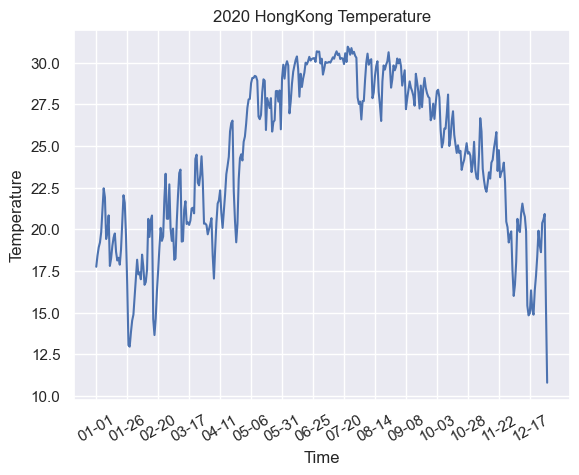

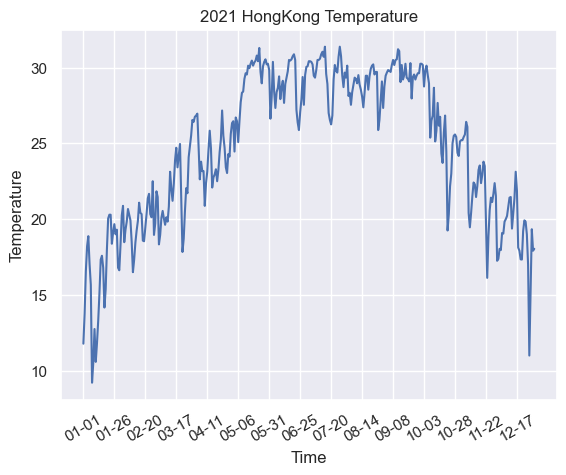

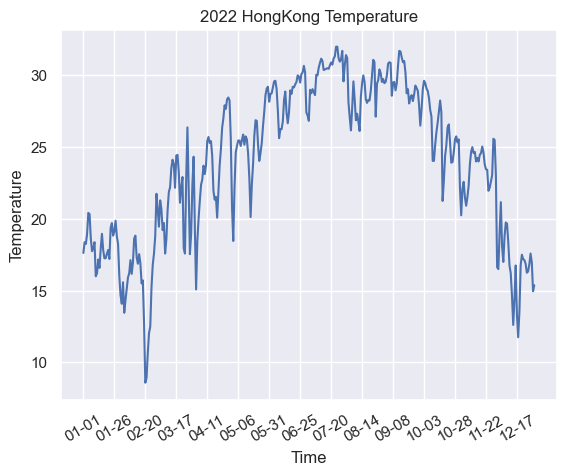

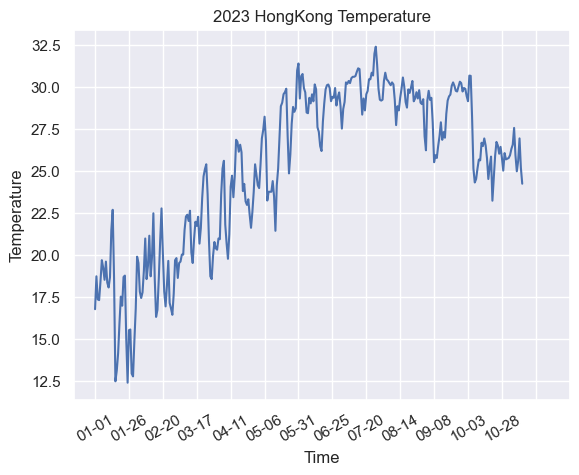

In [79]:
sns.set()
plt.plot(new_data_2020["Time"],new_data_2020["Temperature"])
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("2020 HongKong Temperature")
plt.xticks(range(0,len(new_data_2020["Time"]),25),rotation=30)
plt.show()

plt.plot(new_data_2021["Time"],new_data_2021["Temperature"])
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("2021 HongKong Temperature")
plt.xticks(range(0,len(new_data_2020["Time"]),25),rotation=30)
plt.show()

plt.plot(new_data_2022["Time"],new_data_2022["Temperature"])
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("2022 HongKong Temperature")
plt.xticks(range(0,len(new_data_2020["Time"]),25),rotation=30)
plt.show()

plt.plot(new_data_2023["Time"],new_data_2023["Temperature"])
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("2023 HongKong Temperature")
plt.xticks(range(0,len(new_data_2020["Time"]),25),rotation=30)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


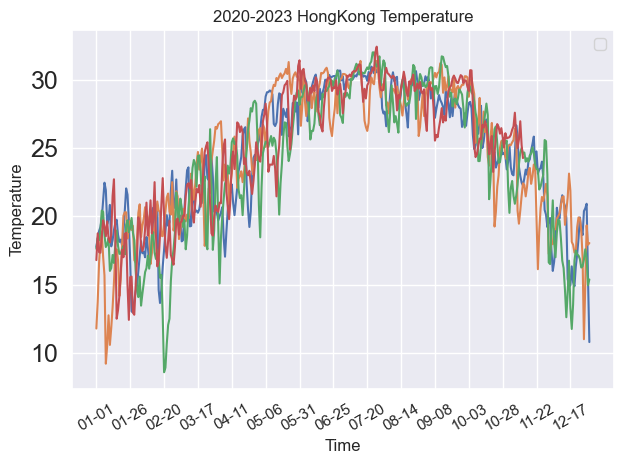

In [80]:
sns.set()
plt.plot(new_data_2020["Time"],new_data_2020["Temperature"])

plt.plot(new_data_2021["Time"],new_data_2021["Temperature"])

plt.plot(new_data_2022["Time"],new_data_2022["Temperature"])

plt.plot(new_data_2023["Time"],new_data_2023["Temperature"])
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("2020-2023 HongKong Temperature")
# 显示图形
plt.xticks(range(0,len(new_data_2020["Time"]),25),rotation=30)
plt.yticks(size=18)
plt.tight_layout()
# 添加图例
plt.legend()
plt.show()

In [81]:
from joblib import Parallel, delayed

def process_year(year):
    data_year = new_data[new_data["Time"].astype(str).str[:4] == str(year)]
    new_data_year = pd.DataFrame({"Time": data_year["Time"], "Temperature": data_year["Temperature"], "Relative Humidity": data_year["Relative Humidity"]}).reset_index()
    new_data_year["Time"] = new_data_year["Time"].astype(str).str[-5:]
    new_data_year.drop(59, inplace=True)
    return new_data_year

years = [2020, 2021, 2022, 2023]
new_data_years = Parallel(n_jobs=-1)(delayed(process_year)(year) for year in years)
new_data_years

[     index   Time  Temperature  Relative Humidity
 0      154  01-01    17.750000          80.250000
 1      155  01-02    18.416667          77.916667
 2      156  01-03    18.916667          81.500000
 3      157  01-04    19.208333          82.958333
 4      158  01-05    19.833333          78.833333
 ..     ...    ...          ...                ...
 361    515  12-27    20.375000          71.875000
 362    516  12-28    20.583333          68.500000
 363    517  12-29    20.916667          74.791667
 364    518  12-30    15.541667          51.708333
 365    519  12-31    10.791667          37.541667
 
 [365 rows x 4 columns],
      index   Time  Temperature  Relative Humidity
 0      520  01-01    11.782609          40.000000
 1      521  01-02    13.750000          50.708333
 2      522  01-03    16.565217          64.217391
 3      523  01-04    18.208333          65.916667
 4      524  01-05    18.875000          65.208333
 ..     ...    ...          ...                ...
 360